Question 1a

<class 'numpy.ndarray'>


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:67: RuntimeWarning: overflow encountered in exp


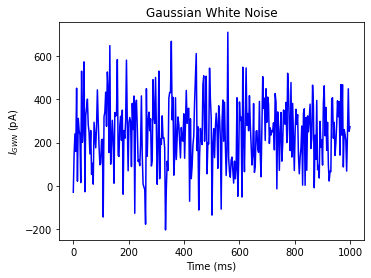

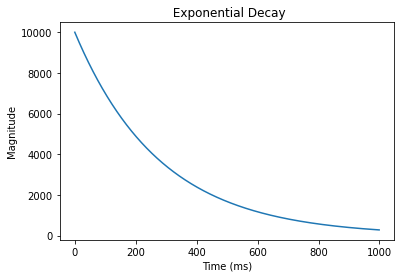

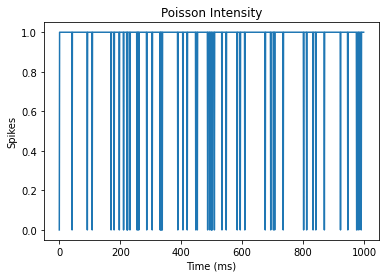

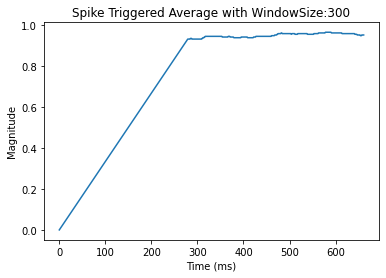

In [80]:
import math
import numpy as np
import matplotlib.pyplot as plt

def my_GWN(dt, T, range_t, mu, sig, myseed=False):
  """
  Function that generates Gaussian white noise input
  Returns:
    I          : Gaussian white noise input
  """
  # Retrieve simulation parameters
  dt = dt
  T = T
  range_t = range_t
  Lt = range_t.size

  # set random seed
  # you can fix the seed of the random number generator so that the results
  # are reliable however, when you want to generate multiple realization
  # make sure that you change the seed for each new realization.
  if myseed:
      np.random.seed(seed=myseed)
  else:
      np.random.seed()

  # generate GWN
  # we divide here by 1000 to convert units to sec.
  I_gwn = mu + sig * np.random.randn(Lt) / np.sqrt(dt / 1000.)

  return I_gwn

def plot_GWN(range_t, I_GWN):
  """
  Returns:
    figure of the gaussian white noise input
  """
  plt.figure(figsize=(12, 4))
  plt.subplot(121)
  plt.plot(range_t[::3], I_GWN[::3], 'b')
  plt.title('Gaussian White Noise')
  plt.xlabel('Time (ms)')
  plt.ylabel(r'$I_{GWN}$ (pA)')

#White Noise
dt = 1
T = 1000
range_t = np.arange(0, T, dt)
sig_gwn = 5
mu_gwn = 250.
I_GWN = my_GWN(dt, T, range_t, mu_gwn, sig_gwn, myseed=2020)
baseline = 1
plot_GWN(range_t, I_GWN)

#Exponential Decay
N, tau = 10000, 28
tmax = 100
t = np.linspace(0, tmax, 1000)
input_filter = N * np.exp(-t/tau)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title(" Exponential Decay")
plt.xlabel("Time (ms)")
plt.ylabel("Magnitude")
ax.plot(range_t, input_filter)

step = ((input_filter * I_GWN) + baseline)
poisson_intensity = 1.0 /(1 + np.exp(-step))
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
plt.title("Poisson Intensity")
plt.xlabel("Time (ms)") 
plt.ylabel('Spikes')
ax1.plot(range_t, poisson_intensity)
print(type(poisson_intensity))

#Spike Triggered Average 
windowSize = 300
poisson_intensity[:windowSize] = 0
nEvs = sum(poisson_intensity) 
evIdx = np.where(poisson_intensity == 1)[0]

avg = []
for w in range(1, len(evIdx)):
  wIdx = range(evIdx[w]- windowSize, evIdx[w-1])
  avg.append(sum([poisson_intensity[wi] for wi in wIdx])/windowSize) 
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
plt.title("Spike Triggered Average with WindowSize:%d"% windowSize)
plt.xlabel("Time (ms)") 
plt.ylabel('Magnitude')
ax2.plot(avg)

#The spike triggered avreage is the exact opposite of the input filter. 



Question 1b

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


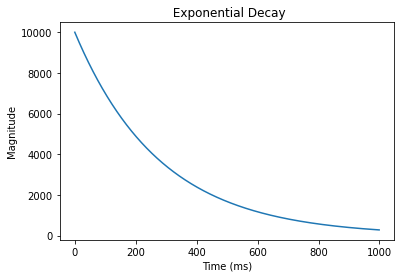

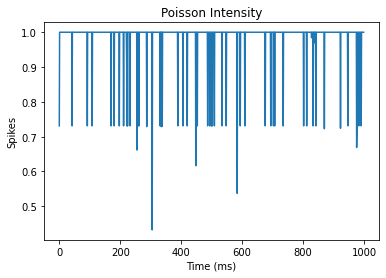

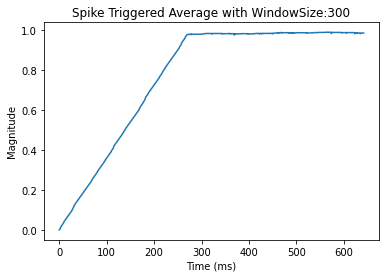

In [81]:
#N-Layer LNP 

#Exponential Decay
N, tau = 10000, 28
tmax = 100
t = np.linspace(0, tmax, 1000)
input_filter = N * np.exp(-t/tau)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title(" Exponential Decay")
plt.xlabel("Time (ms)")
plt.ylabel("Magnitude")
ax.plot(range_t, input_filter)

n_layers = 20
input = input_filter
for i in range(n_layers):
  step = ((input * I_GWN) + baseline)
  poisson_intensity1 = 1.0 /(1 + np.exp(-step))
  input = poisson_intensity1

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
plt.title("Poisson Intensity")
plt.xlabel("Time (ms)") 
plt.ylabel('Spikes')
ax1.plot(range_t, poisson_intensity1)

#Spike Triggered Average 
windowSize = 300
poisson_intensity1[:windowSize] = 0
nEvs = sum(poisson_intensity1) 
evIdx = np.where(poisson_intensity1 == 1)[0]

avg = []
for w in range(1, len(evIdx)):
  wIdx = range(evIdx[w]- windowSize, evIdx[w-1])
  avg.append(sum([poisson_intensity1[wi] for wi in wIdx])/windowSize) 
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
plt.title("Spike Triggered Average with WindowSize:%d"% windowSize)
plt.xlabel("Time (ms)") 
plt.ylabel('Magnitude')
ax2.plot(avg)

#The extra layers helped smooth out the simulated spike response. The spike triggered average remains the exact opposite of the input filter. 
